# TASK 1- Tensor Manipulations (NumPy)

In [1]:
import numpy as np
np.set_printoptions(suppress=True)

In [ ]:
a = np.array([[1,2,3],[4,5,6]], dtype=np.float32)
b = np.ones((2,3), dtype=np.float32) * 10
print(a); print(b)

[[1. 2. 3.]
 [4. 5. 6.]]
[[10. 10. 10.]
 [10. 10. 10.]]


In [ ]:
c_add = a + b
c_mul = a * b
print(c_add); print(c_mul)

[[11. 12. 13.]
 [14. 15. 16.]]
[[10. 20. 30.]
 [40. 50. 60.]]


In [ ]:
r = a.reshape(3,2)
print(r)

[[1. 2.]
 [3. 4.]
 [5. 6.]]


In [ ]:
print(a[0])
print(a[:,1])
print(a[0:2,1:3])

[1. 2. 3.]
[2. 5.]
[[2. 3.]
 [5. 6.]]


In [ ]:
cat_cols = np.concatenate([a,b], axis=1)
cat_rows = np.concatenate([a,b], axis=0)
stack0 = np.stack([a,b], axis=0)
stack2 = np.stack([a,b], axis=2)
print(cat_cols); print(cat_rows)
print(stack0.shape); print(stack2.shape)

[[ 1.  2.  3. 10. 10. 10.]
 [ 4.  5.  6. 10. 10. 10.]]
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [10. 10. 10.]
 [10. 10. 10.]]
(2, 2, 3)
(2, 3, 2)


In [ ]:
x = np.arange(12).reshape(3,4)
left,right = np.split(x,2,axis=1)
top,mid = np.split(x,[1],axis=0)
print(left); print(right); print(top); print(mid)

[[0 1]
 [4 5]
 [8 9]]
[[ 2  3]
 [ 6  7]
 [10 11]]
[[0 1 2 3]]
[[ 4  5  6  7]
 [ 8  9 10 11]]


In [ ]:
print(a.sum())
print(a.mean(axis=0))
print(a.max())
print(a.T)
w = np.arange(6, dtype=np.float32).reshape(3,2)
print(a @ w)
print(np.maximum(a,0))

21.0
[2.5 3.5 4.5]
6.0
[[1. 4.]
 [2. 5.]
 [3. 6.]]
[[16. 22.]
 [34. 49.]]
[[1. 2. 3.]
 [4. 5. 6.]]


## **Task 2 — Simple Neural Network (Keras)**

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.random.set_seed(42)

In [3]:
model = keras.Sequential([
    layers.Input(shape=(20,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [4]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 387 (1.51 KB)

 Trainable params: 387 (1.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X = np.random.randn(256,20).astype('float32')
y = np.random.randint(0,3,(256,))
history = model.fit(X,y,epochs=3,batch_size=32,validation_split=0.2)

Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.3301 - loss: 1.3382 - val_accuracy: 0.3077 - val_loss: 1.4620
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3255 - loss: 1.3024 - val_accuracy: 0.2885 - val_loss: 1.4380
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3363 - loss: 1.2755 - val_accuracy: 0.2885 - val_loss: 1.4163


## **Task 3A — MNIST Classification**

In [82]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
x_train = (x_train.astype('float32')/255).reshape(-1,784)
x_test = (x_test.astype('float32')/255).reshape(-1,784)
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [83]:
# Normal Model
mnist_model = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [70]:
# Underfitted Model
mnist_model = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(8, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [75]:
# Overfitted Model
mnist_model = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [84]:
mnist_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [85]:
history_mnist = mnist_model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1
)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7952 - loss: 0.7184 - val_accuracy: 0.9525 - val_loss: 0.1765
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9339 - loss: 0.2247 - val_accuracy: 0.9658 - val_loss: 0.1291
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9528 - loss: 0.1638 - val_accuracy: 0.9695 - val_loss: 0.1075
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9584 - loss: 0.1355 - val_accuracy: 0.9737 - val_loss: 0.0933
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9670 - loss: 0.1129 - val_accuracy: 0.9758 - val_loss: 0.0858


In [86]:
test_loss,test_acc = mnist_model.evaluate(x_test,y_test,verbose=0)  #verbose=0 tells Keras not to print the training progress text
print('MNIST Test Accuracy:', test_acc)

MNIST Test Accuracy: 0.9717000126838684


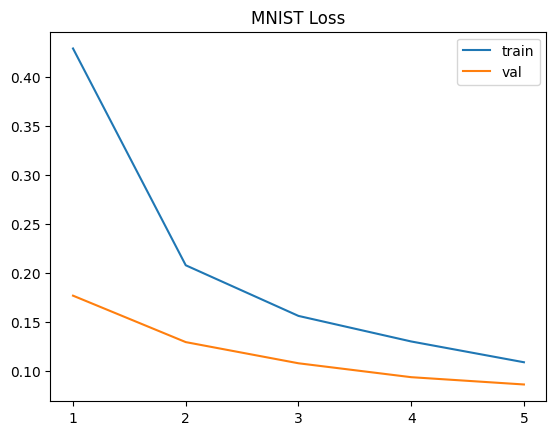

In [87]:
import matplotlib.pyplot as plt
epochs = range(1, len(history_mnist.history["loss"]) + 1)
plt.plot(epochs,history_mnist.history['loss'])
plt.plot(epochs, history_mnist.history['val_loss'])
plt.xticks(epochs)
plt.title('MNIST Loss'); plt.legend(['train','val']);plt.savefig("mnist_loss.png", dpi=300, bbox_inches='tight'); plt.show()

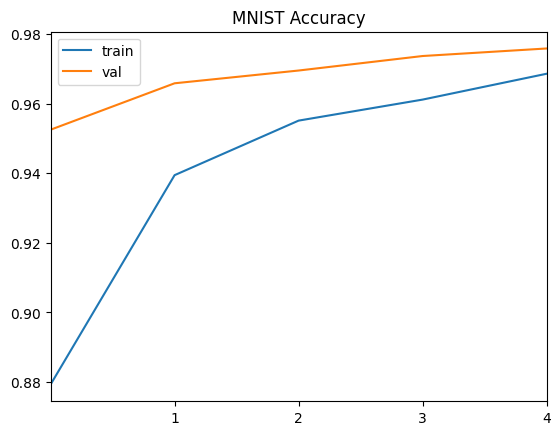

In [88]:
epochs = range(1, len(history_mnist.history["accuracy"]) + 1)
plt.plot(history_mnist.history['accuracy'])
plt.plot(history_mnist.history['val_accuracy'])
plt.xticks(epochs); plt.margins(x=0)
plt.title('MNIST Accuracy'); plt.legend(['train','val']); plt.savefig("mnist_accuracy.png", dpi=300, bbox_inches='tight'); plt.show()

## **Task 3B — IMDb Sentiment Classification**

In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

num_words = 10000
maxlen = 200

(X_train,y_train),(X_test,y_test) = keras.datasets.imdb.load_data(num_words=num_words)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
print(X_train.shape, X_test.shape)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(25000, 200) (25000, 200)


In [30]:
imdb_model = keras.Sequential([
    layers.Embedding(num_words,64,input_length=maxlen),
    layers.GlobalAveragePooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [31]:
imdb_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [32]:
history_imdb = imdb_model.fit(
    X_train, y_train,
    epochs=6,
    batch_size=512,
    validation_split=0.2
)

Epoch 1/6
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.5807 - loss: 0.6884 - val_accuracy: 0.7414 - val_loss: 0.6505
Epoch 2/6
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7386 - loss: 0.6228 - val_accuracy: 0.7978 - val_loss: 0.5088
Epoch 3/6
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8169 - loss: 0.4719 - val_accuracy: 0.8390 - val_loss: 0.3933
Epoch 4/6
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8558 - loss: 0.3610 - val_accuracy: 0.8594 - val_loss: 0.3406
Epoch 5/6
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8778 - loss: 0.3099 - val_accuracy: 0.8690 - val_loss: 0.3157
Epoch 6/6
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8977 - loss: 0.2690 - val_accuracy: 0.8724 - val_loss: 0.3087


In [33]:
loss,acc = imdb_model.evaluate(X_test,y_test,verbose=0)
print('IMDb Test Accuracy:', acc)

IMDb Test Accuracy: 0.8673999905586243


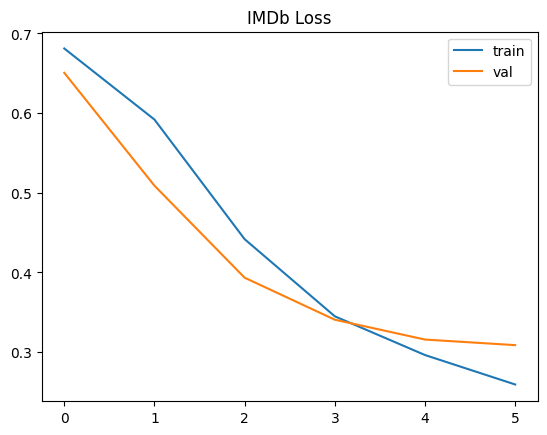

In [54]:
plt.plot(history_imdb.history['loss'])
plt.plot(history_imdb.history['val_loss'])
plt.title('IMDb Loss'); plt.legend(['train','val']);  plt.savefig("IMDB_Loss.png", dpi=300, bbox_inches='tight'); plt.show()

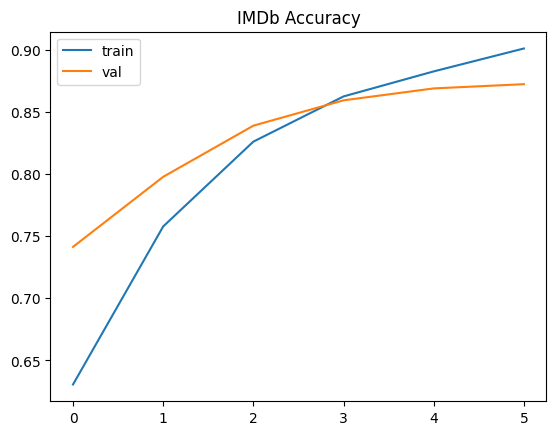

In [53]:
plt.plot(history_imdb.history['accuracy'])
plt.plot(history_imdb.history['val_accuracy'])
plt.title('IMDb Accuracy'); plt.legend(['train','val']);  plt.savefig("IMDB_Accuracy.png", dpi=300, bbox_inches='tight'); plt.show()